# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [1]:
# Libraries
import os
import ta
import fnmatch
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/workspaces/data_ingestion/05_Yahoo_Finance_WebAPI


## Get data
List of stock market symbols: https://finance.yahoo.com/lookup

In [2]:
# Retrieve the Microsoft stock data from Yahoo finance
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

data = yf.download('MSFT', start = "2022-01-01", end = today, progress=False)
data.tail()

Today is: 2025-11-03


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-10-27,531.520020,534.580017,529.010010,531.780029,18734700
2025-10-28,542.070007,553.719971,540.770020,550.000000,29986700
2025-10-29,541.549988,546.270020,536.729980,544.940002,36023000
2025-10-30,525.760010,534.969971,522.119995,530.479980,41023100
2025-10-31,517.809998,529.320007,515.099976,528.880005,33978900


## Calculate techniqual indicators

In [3]:
# Function to compute Bollinger Bands 
def BBANDS(data, n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for Google using the 50-day Moving average
BBANDS = BBANDS(data, 50)
BBANDS

Price,Close,High,Low,Open,Volume,MiddleBand,UpperBand,LowerBand
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,
Date,,,,,,,,
2022-01-03,324.504578,327.655108,319.686689,325.086220,28865100,NaN,NaN,NaN
2022-01-04,318.940277,324.940827,316.138715,324.582127,32674300,NaN,NaN,NaN
2022-01-05,306.696869,316.090299,306.309117,315.886705,40054300,NaN,NaN,NaN
2022-01-06,304.273376,308.945862,301.956511,303.565708,39646100,NaN,NaN,NaN
2022-01-07,304.428467,306.813167,300.599349,304.535086,32720000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-10-27,531.520020,534.580017,529.010010,531.780029,18734700,511.967891,527.857115,496.078668
2025-10-28,542.070007,553.719971,540.770020,550.000000,29986700,512.484266,530.480147,494.488385


## Plot data and techniqual indicators

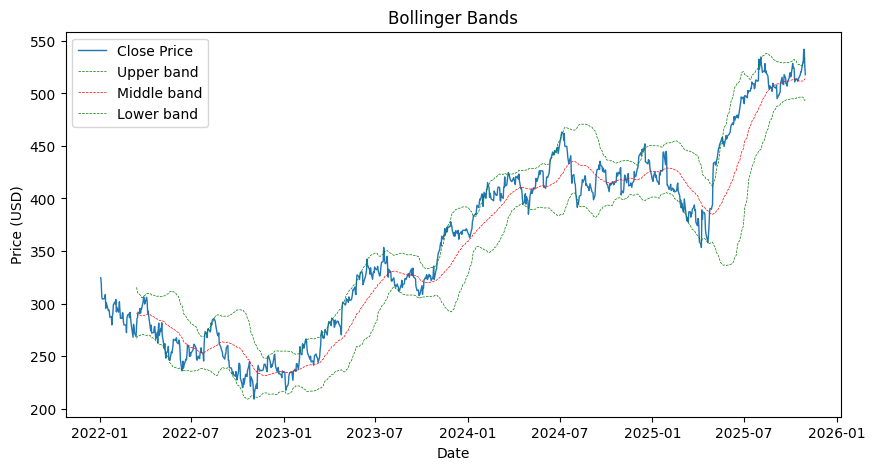

In [4]:
# Create the plot
plt.figure(figsize=(10, 5))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(BBANDS.Close, lw=1.0, label='Close Price')
plt.plot(data['UpperBand'], 'g--', lw=0.5, label='Upper band')
plt.plot(data['MiddleBand'], 'r--', lw=0.5, label='Middle band')
plt.plot(data['LowerBand'], 'g--', lw=0.5, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-03 12:04:49
Python Version: 3.11.13
-----------------------------------
